# Compare Markov with semi-Markov models

Here, we compare standard hidden state Markov models (HMMs) with hidden semi-Markov models (HSMMs) for inferring features in a neural dataset.

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import cPickle as pickle
from spiketopics.helpers import *

%matplotlib inline
sns.set_style('darkgrid')
savefigs = False

In [2]:
dt = 1. / 30  # time bin size

# Load file

Have to do this one at a time, since files are so large.

In [3]:
hmm_file = 'data/features_hmm.csv'
hsmm_file = 'data/features_hsmm.csv'

In [4]:
zm = pd.read_csv(hmm_file)

In [5]:
zsm = pd.read_csv(hsmm_file)

In [6]:
zmap = np.around(zm).astype('int')

In [7]:
zsmap = np.around(zsm).astype('int')

In [8]:
slc = slice(500, 1000)

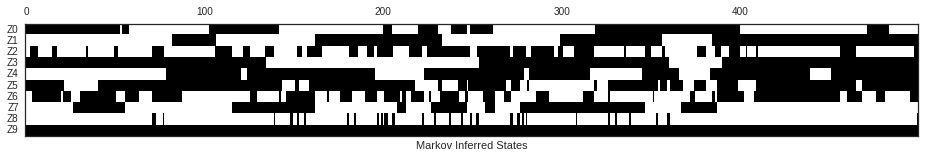

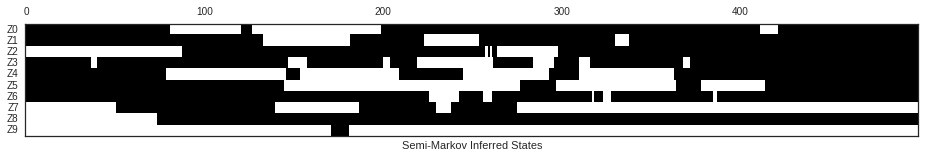

In [9]:
if savefigs:
    sns.set_context('talk', font_scale=1)

matshow(zmap.values[slc].T, vmin=0, vmax=1);
col_labels = zmap.columns
plt.yticks(xrange(len(col_labels)), col_labels);
plt.xlabel('Markov Inferred States')
    
if savefigs:
    plt.savefig('hmm_features.svg')
    
matshow(zsmap.values[slc].T, vmin=0, vmax=1);
col_labels = zsmap.columns
plt.yticks(xrange(len(col_labels)), col_labels);
plt.xlabel('Semi-Markov Inferred States')

if savefigs:
    plt.savefig('hsmm_features.svg')
    sns.set()

## Get run lengths based on MAP estimate of $z$

In [10]:
runs = [[], []]
for col in zmap:
    this_runs = rle(zmap[col].values)
    runs[0].append(this_runs)

for col in zsmap:
    this_runs = rle(zsmap[col].values)
    runs[1].append(this_runs)
    
K = len(runs[0])

/home/pearson/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/pearson/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:83: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


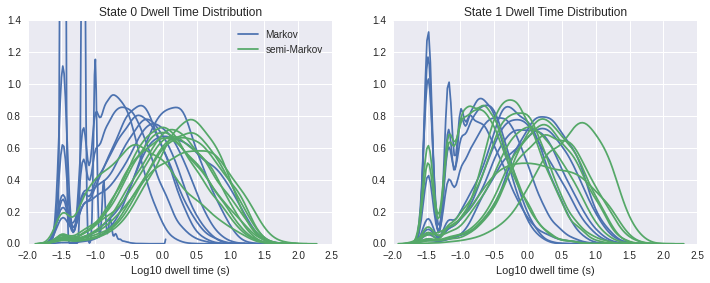

In [11]:
if savefigs:
    sns.set_context('talk', font_scale=1)
    sns.set_style('white')

plt.figure(figsize=(12, 4))
alpha = [1, 1]
col = sns.color_palette()
labs = ['Markov', 'semi-Markov']

for m in xrange(2):  # models
    for k in xrange(K):
        for s in xrange(2):
            plt.subplot(1, 2, s + 1)

            # conditional distribution for "off"
            this_runs = runs[m][k]
            if s == 0 and k == 0:
                label = labs[m]
            else:
                label=''
                
            try:
                this_runlens = this_runs[1][this_runs[2] == s]
                          
                sns.kdeplot(np.log10(this_runlens * dt), alpha=alpha[m],
                           color=col[m], label=label)
                plt.xlabel('Log10 dwell time (s)')
                plt.ylim(0, 1.4)
                plt.title('State {} Dwell Time Distribution'.format(s))
            except:
                pass

if savefigs:
    plt.savefig('runlengths.svg')
    sns.set()
    sns.set_style('darkgrid')